# Kaggle
---

## Import

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats


## 데이터 전처리

In [3]:
data_dir = 'kaggle-kakr-housing-data/data'

train_data_path = join(data_dir,'train.csv')
test_data_path = join(data_dir,'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [4]:
train['date'] = train['date'].apply(lambda x : str(x[:6])).astype(int)
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,201502,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
y = train['price']
del train['price']
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
test['date'] = test['date'].apply(lambda x : str(x[:6])).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64


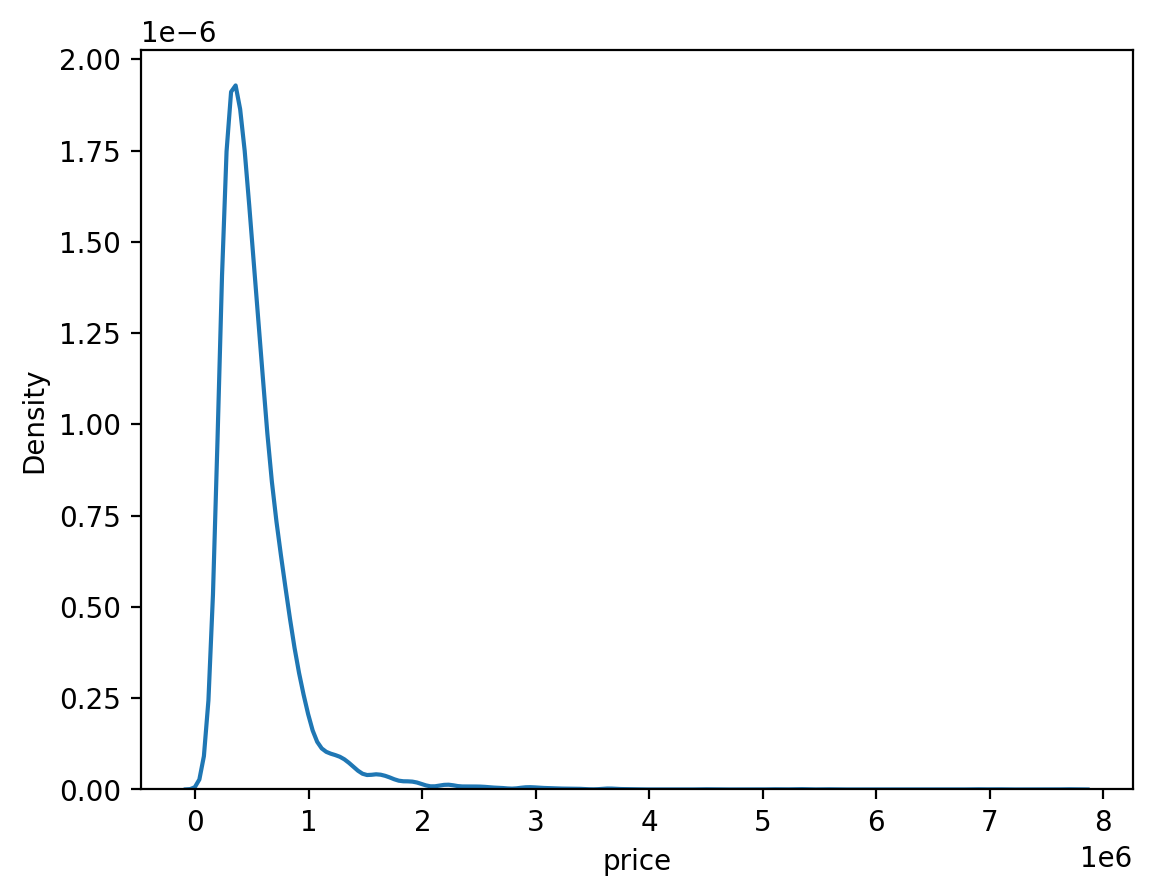

In [7]:
print(y)

sns.kdeplot(y)
plt.show()     # 그래프가 한쪽으로 치우침

In [8]:
print("Skewness : %f" % y.skew())
print("Kurtosis : %f" % y.kurt())   # 첨도가 40으로 3보다 많이 큰 값. 분포가 상당히 뾰족한 편.

Skewness : 4.290252
Kurtosis : 40.154919


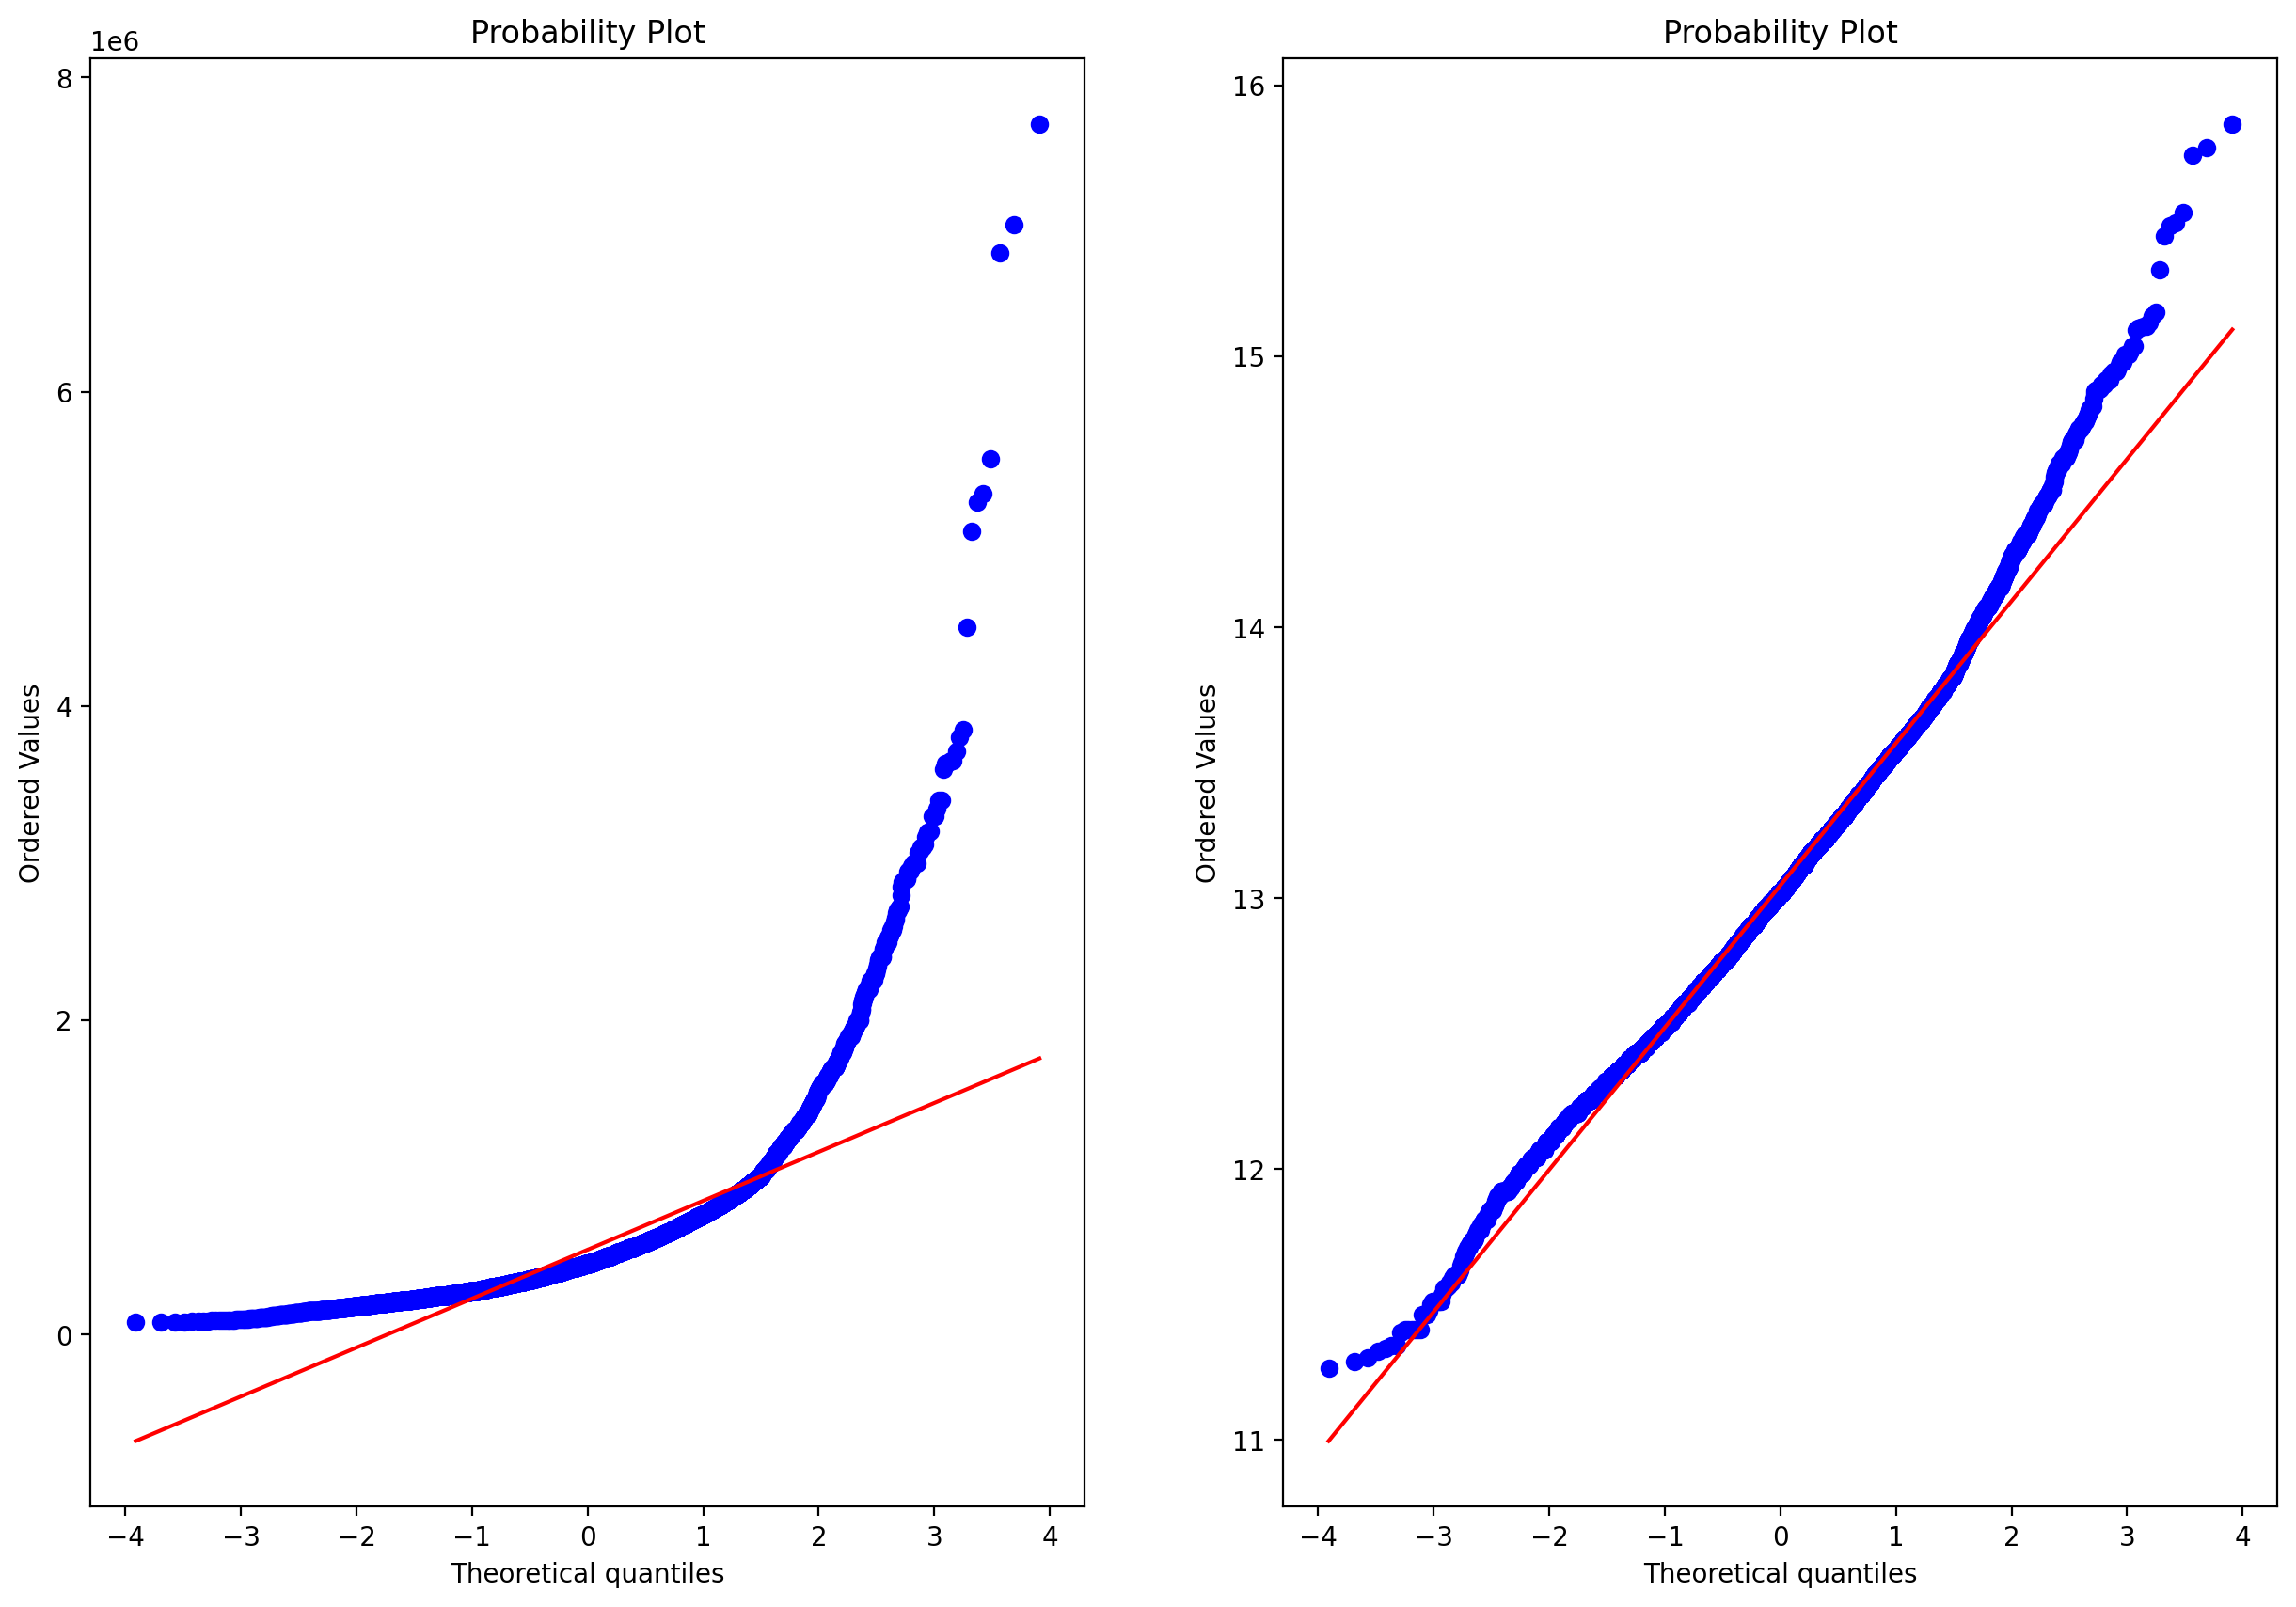

In [9]:
fig = plt.figure(figsize=(15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(y, plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(y), plot=plt)

In [10]:
y = np.log1p(y)
print(y)

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

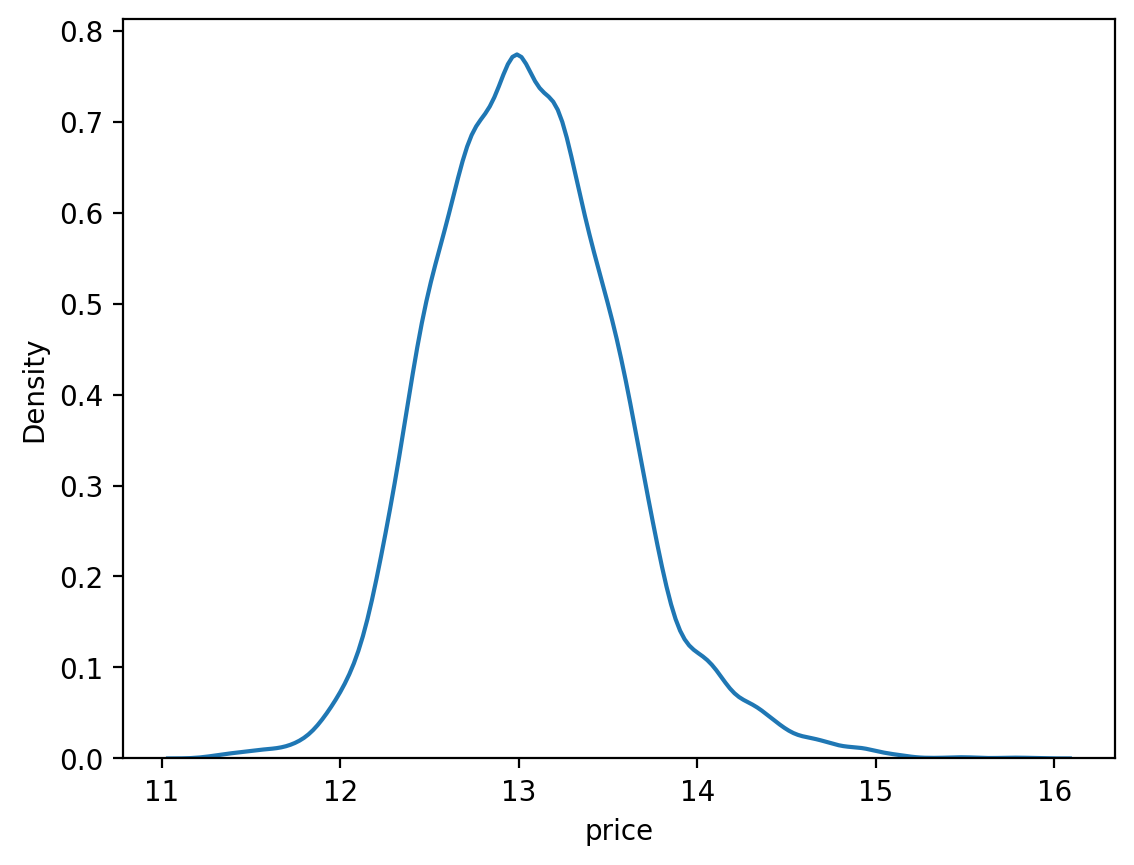

In [11]:
sns.kdeplot(y)
plt.show

In [12]:
train.info()  # 데이터 자료형 info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

## Feature별 상관관계

- 피어슨 상관관계 : 연속형 변수에 사용
- 스피어만 순위 상관관계 : 범주형 변수도 포함되었을 경우 사용

In [13]:
train['price'] = y
train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,201410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309987
1,201502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100718
2,201502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142168
3,201406,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,12.458779
4,201501,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,12.583999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,201410,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,13.322338
15031,201503,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,13.822984
15032,201405,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,12.793862
15033,201502,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,12.899222


['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


<AxesSubplot: >

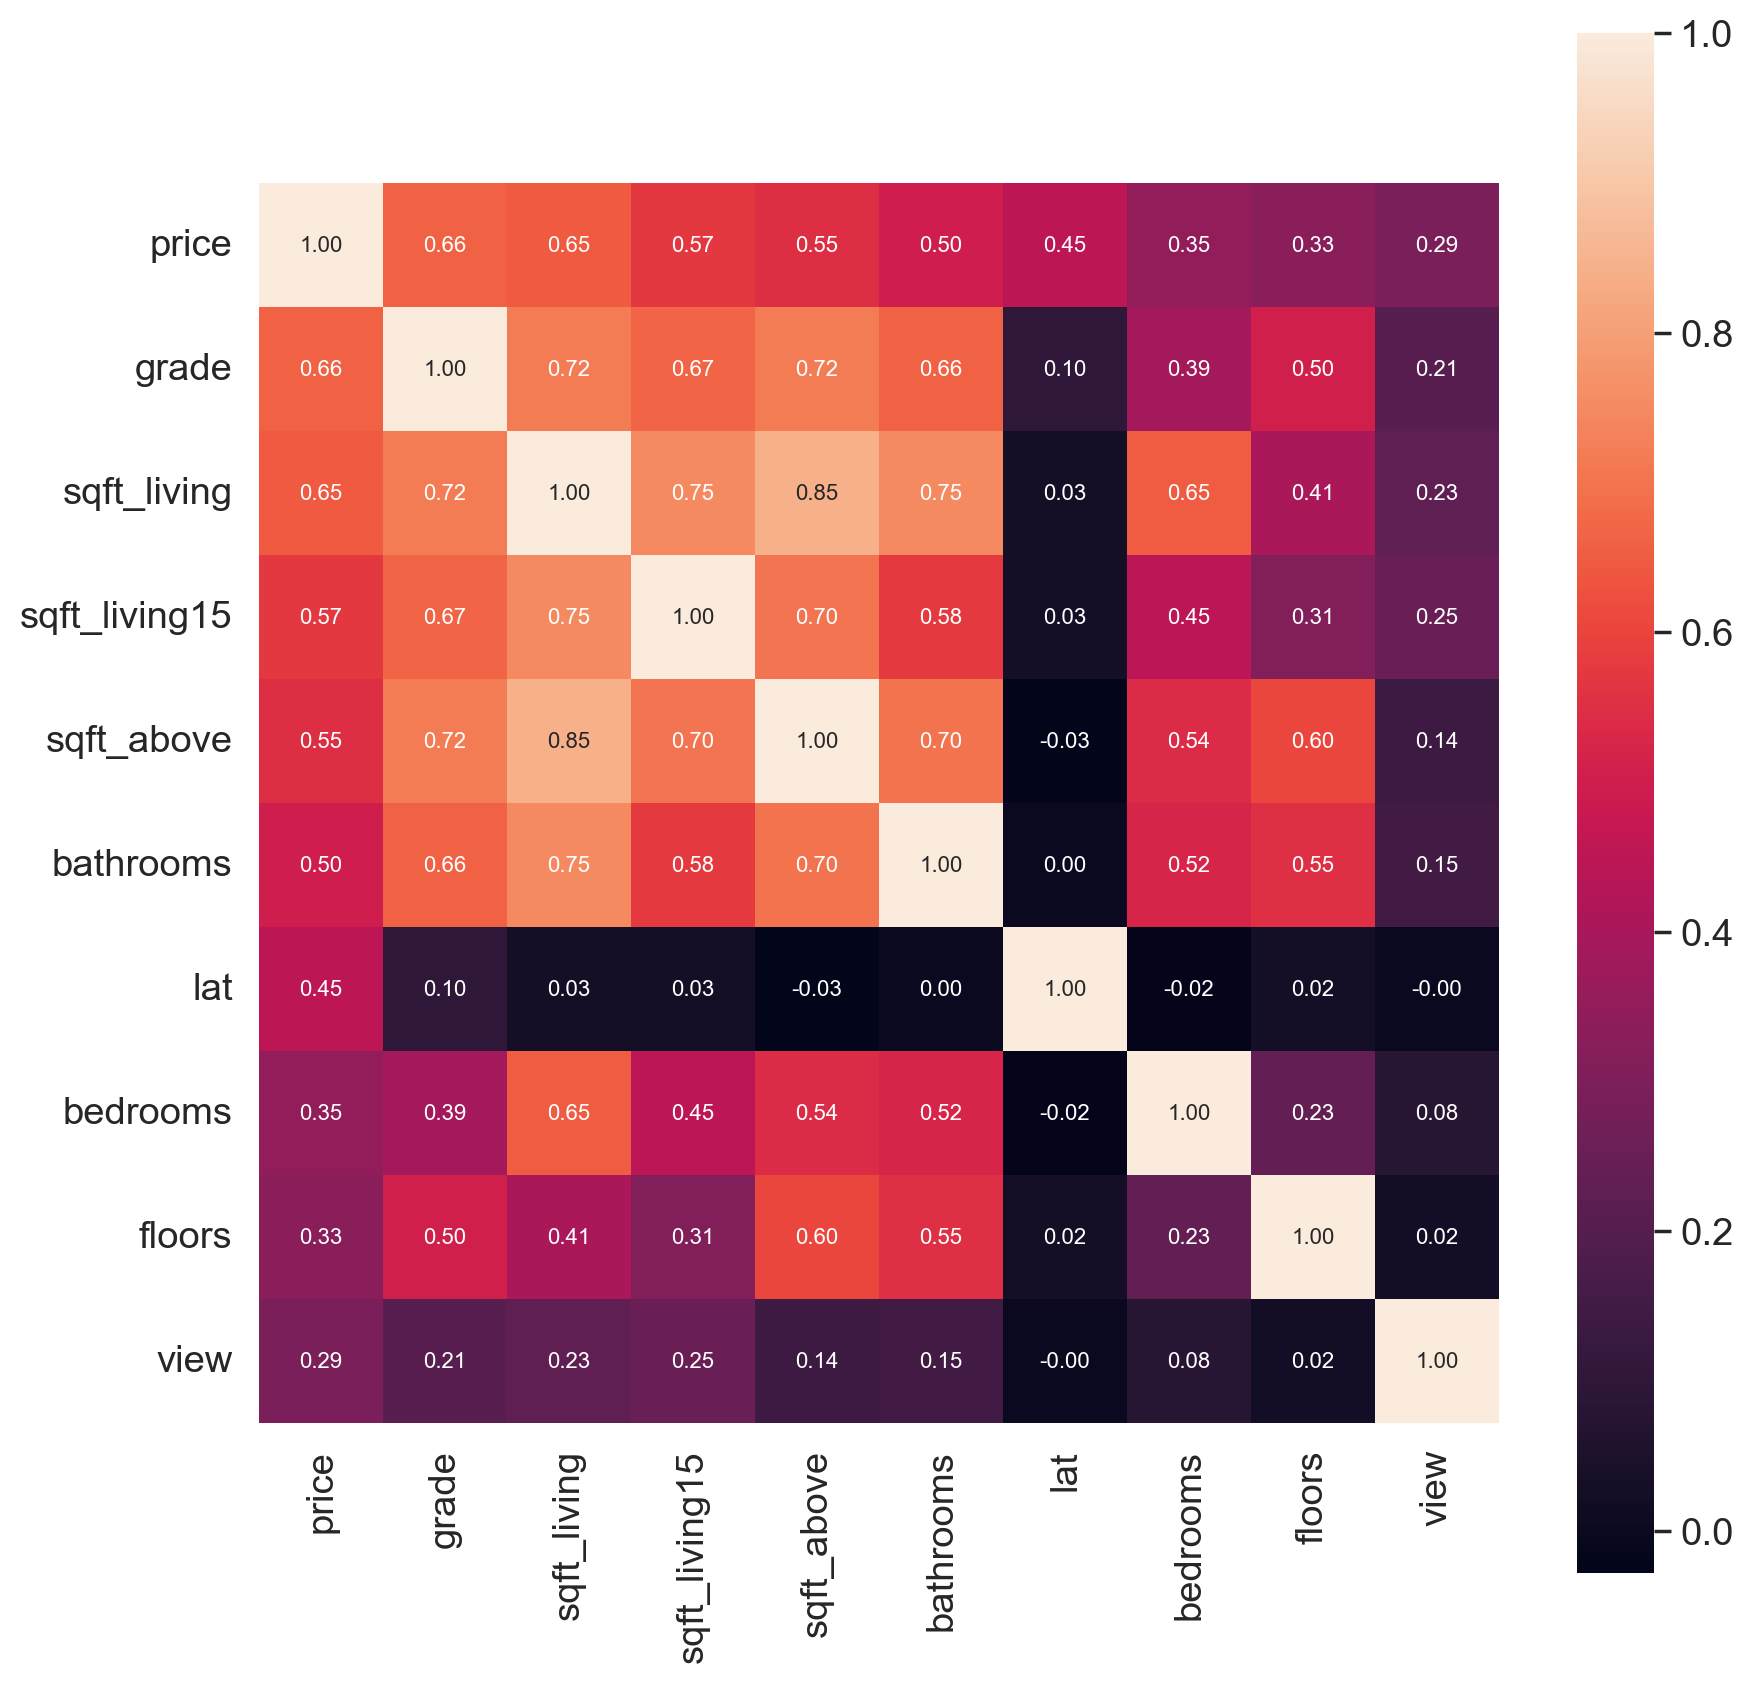

In [14]:
import scipy as sp

cor_abs = abs(train.corr(method='spearman'))
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price와 관련이 높은 column 10개 뽑기

# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(train[cor_cols].values))[0] 
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True, annot_kws={'size' : 8}, xticklabels=cor_cols.values, yticklabels=cor_cols.values)

집의 등급, 주거공간 크기, 부지 크기, 지하실을 제외한 평방 피트, 화장실 숫자, 위도 순서

위도와 상관도가 높은 이유는 위 지역이 시애틀이어서 북쪽으로 갈 수록 살기 좋은 집들이 많기 때문.

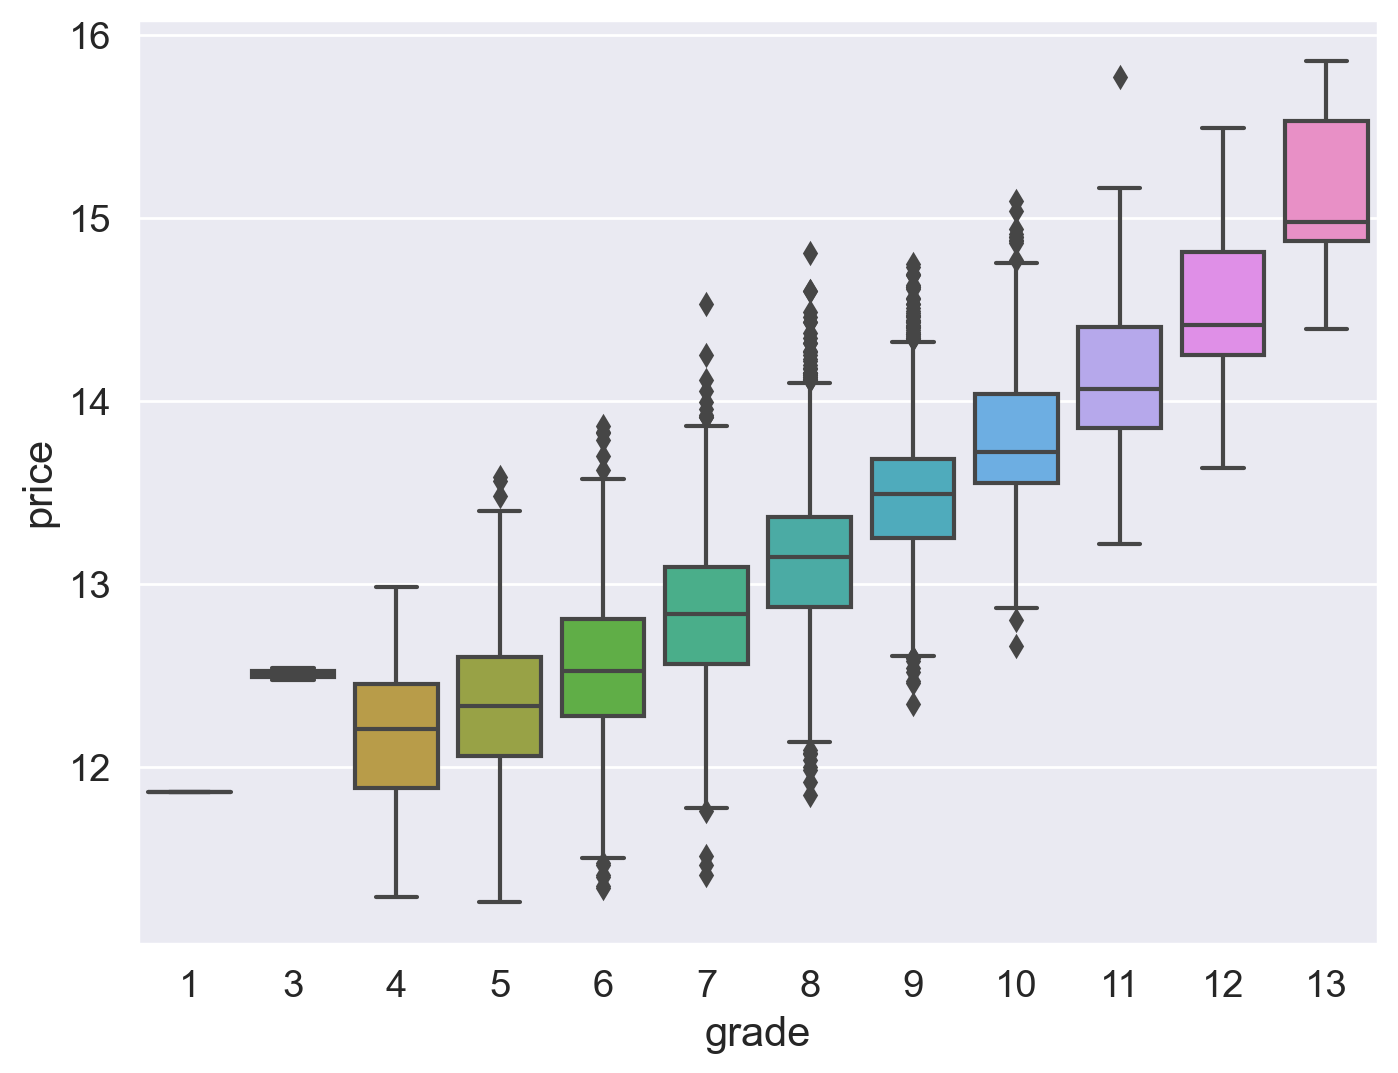

In [15]:
data = pd.concat([train['price'], train['grade']],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='grade',y='price', data=data)

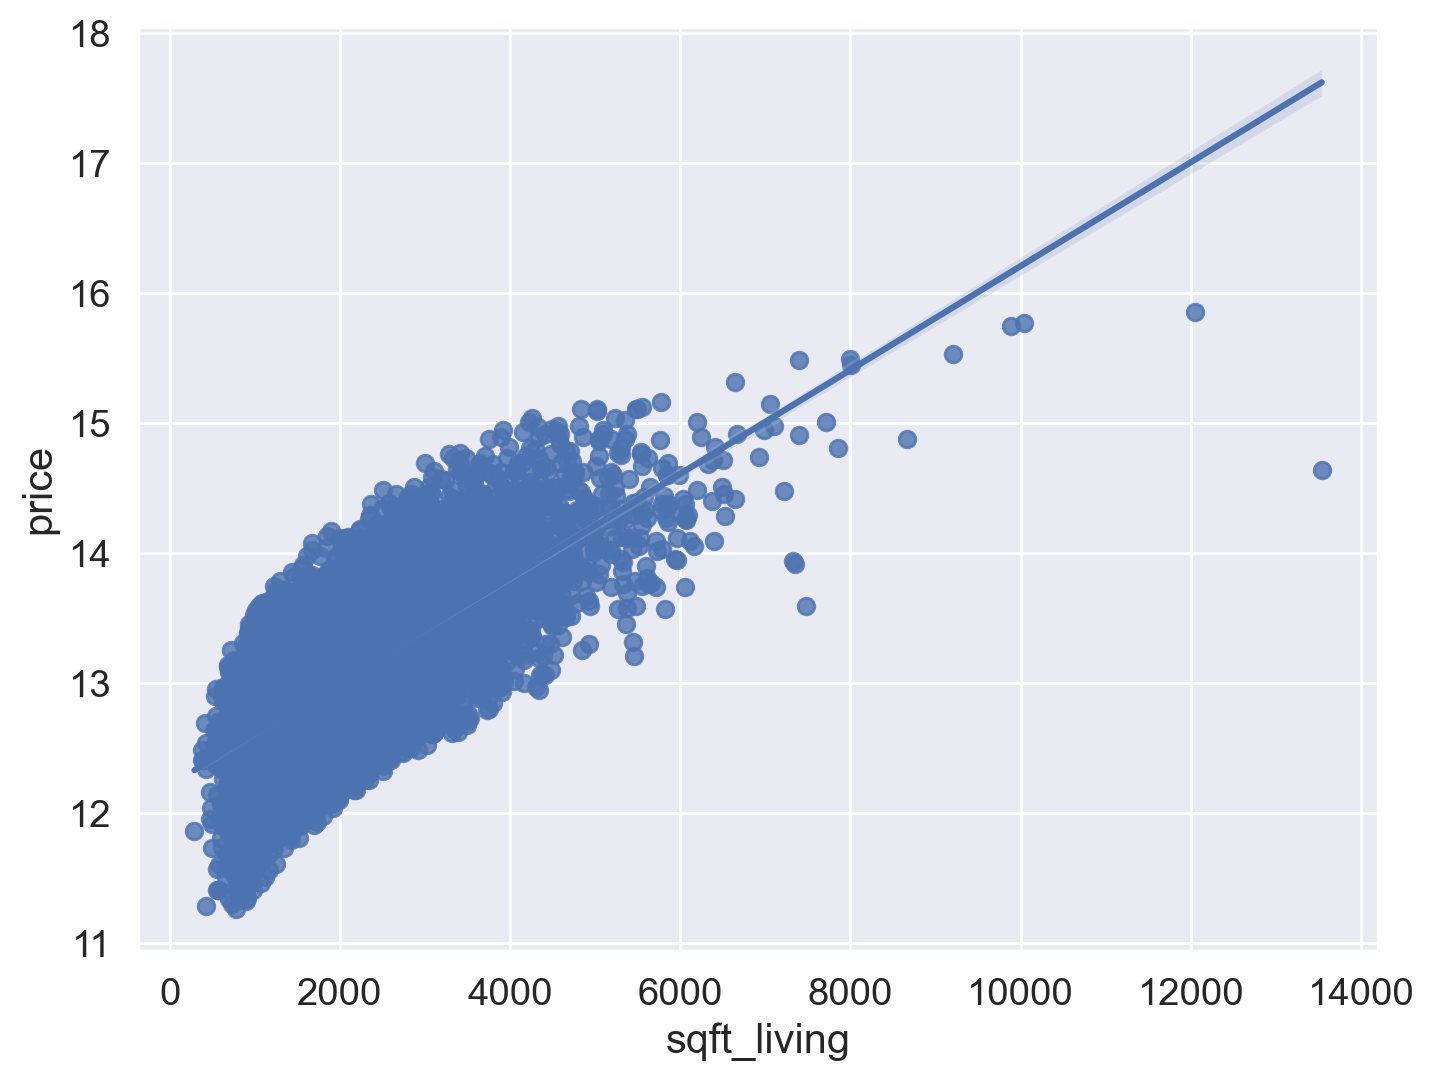

In [16]:
data = pd.concat([train['price'], train['sqft_living']], axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig = sns.regplot(x='sqft_living', y='price',data=data)

데이터 값들을 보니 sqft_living이 14000이나 되는데 price가 14~15 정도 밖에 안되는 값이 있다. 이상치로 보여짐

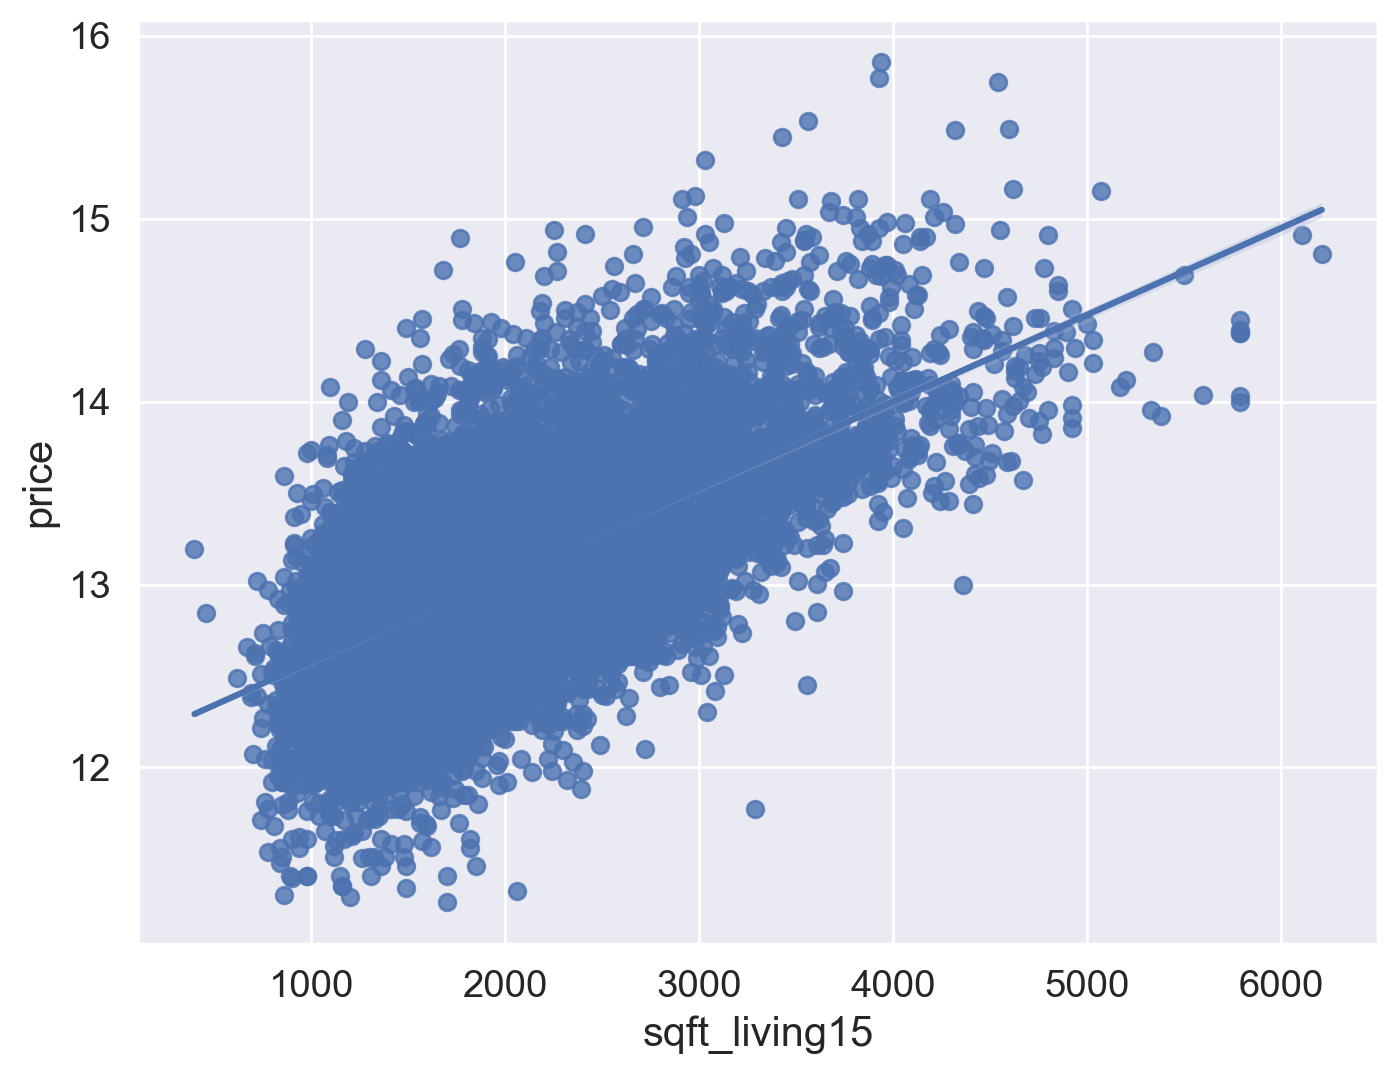

In [17]:
data = pd.concat([train['price'], train['sqft_living15']],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='sqft_living15', y='price', data=data)

분산이 커 보일 뿐더러 이상치로 많이 보임. 

하지만 우리나라 서울과 같이 특정 지역이 작은 면적에 비해 값이 비싼 집일 수 있으니 고려는
해볼 생각 해야할 듯.

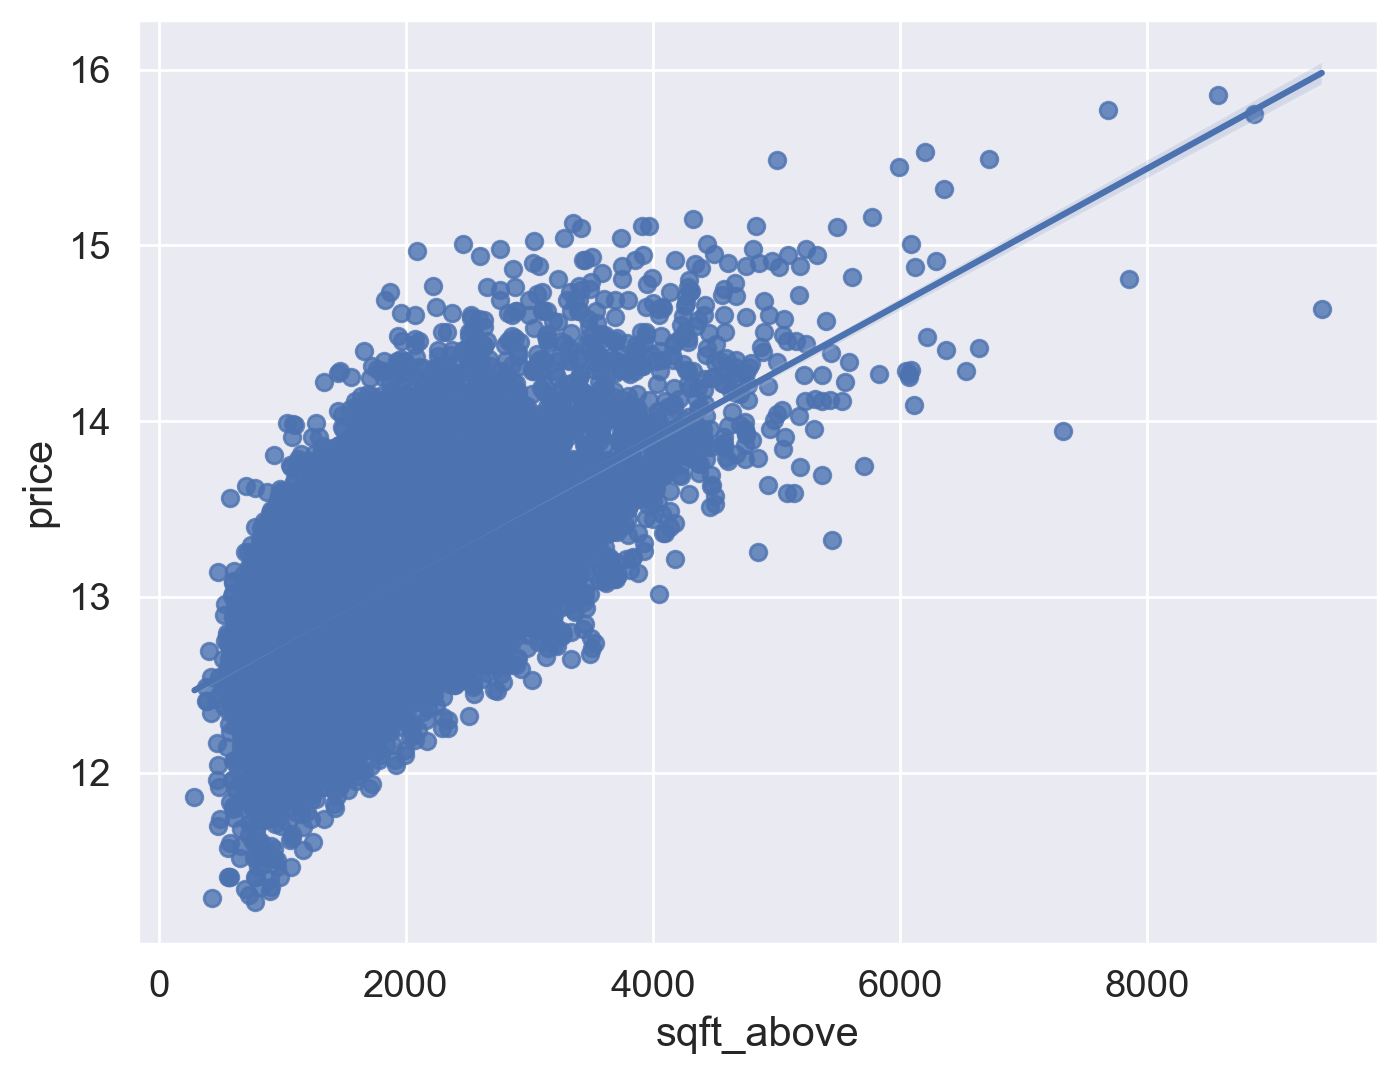

In [18]:
data = pd.concat([train['price'],train['sqft_above']],axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.regplot(x='sqft_above', y='price', data=data)

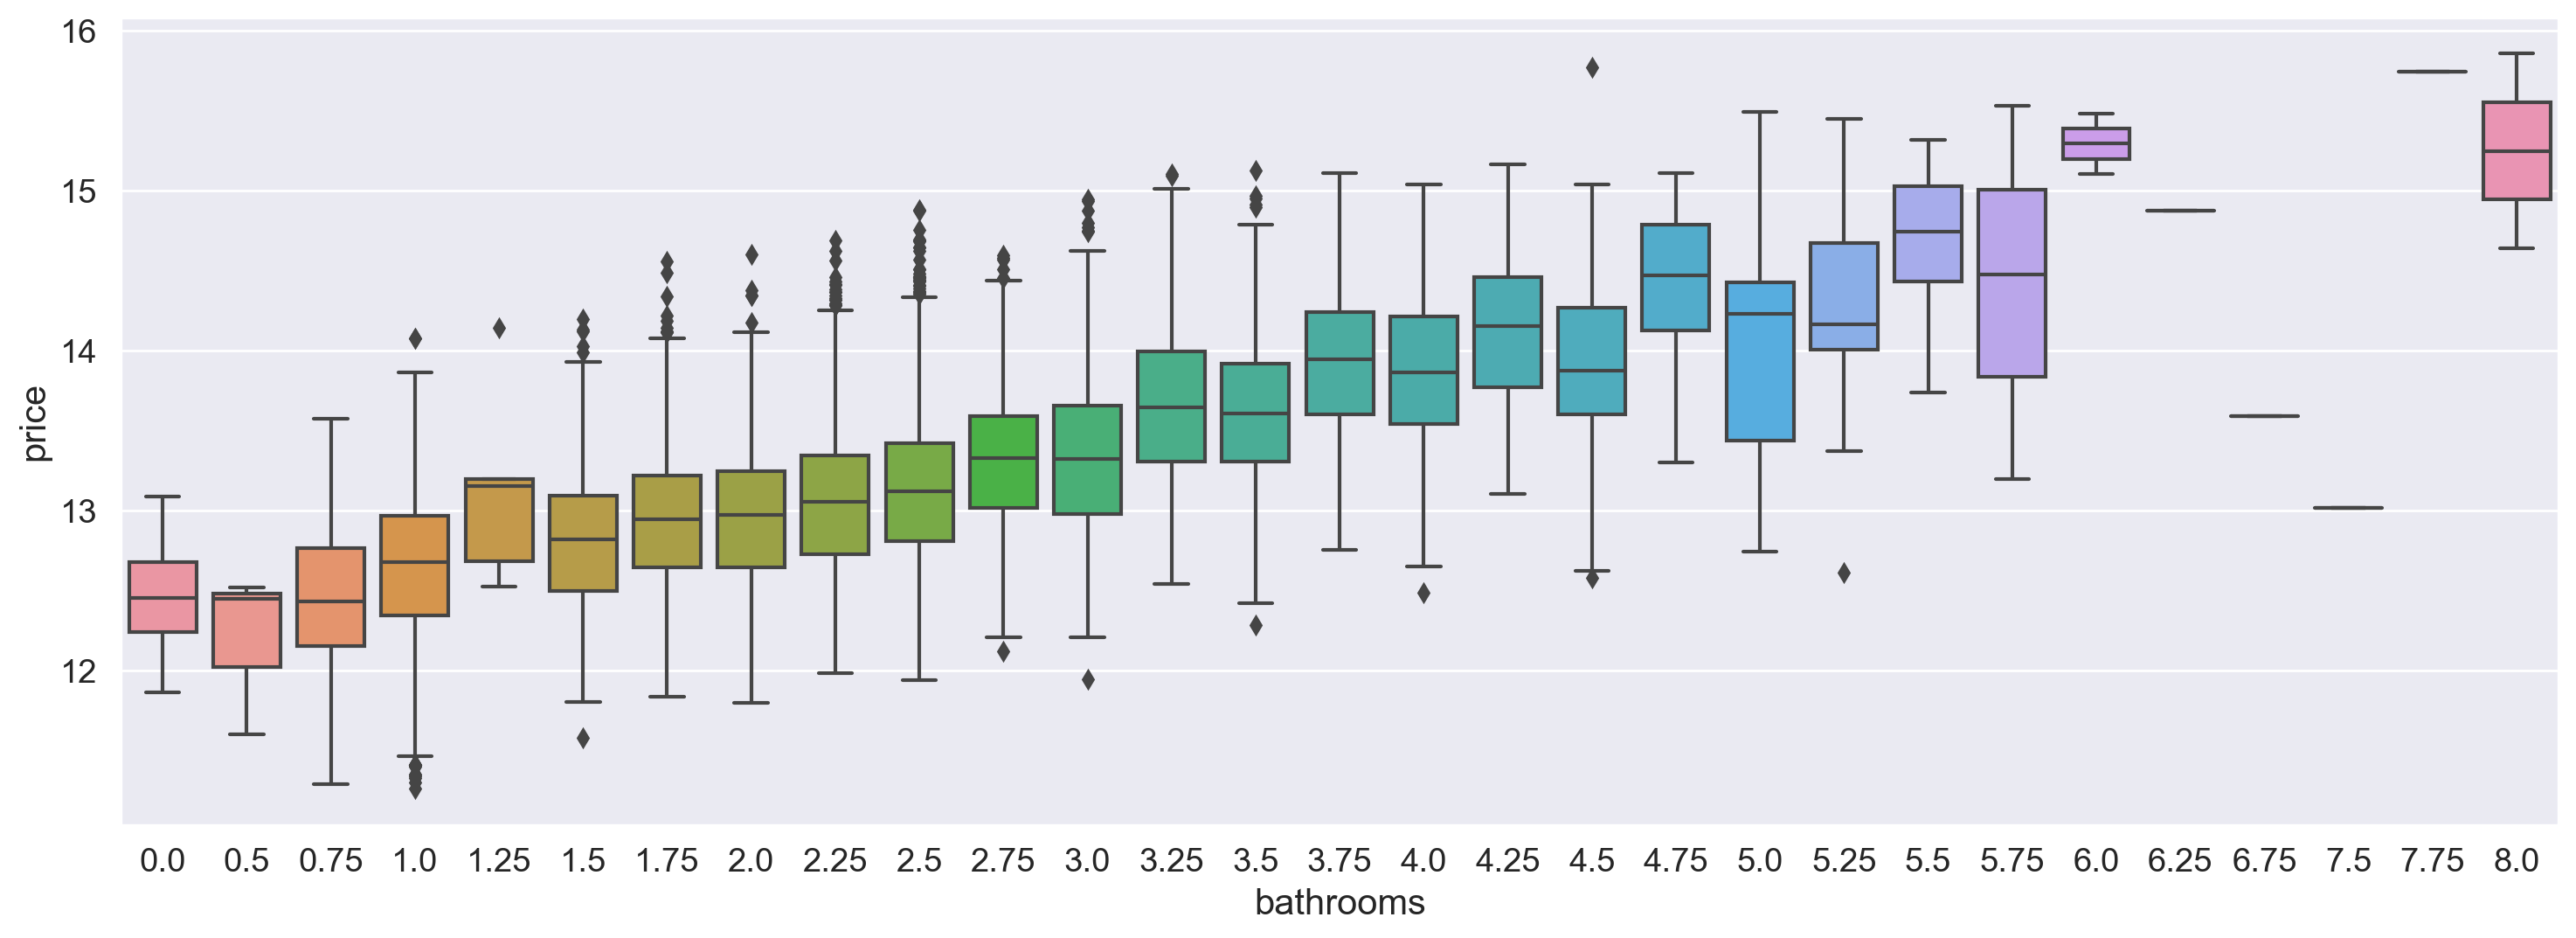

In [19]:
data = pd.concat([train['price'],train['bathrooms']],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x='bathrooms',y='price',data=data)

범주형 데이터로 숫자가 0.5씩 커질 수록 옵션이 하나씩 더 붙음.

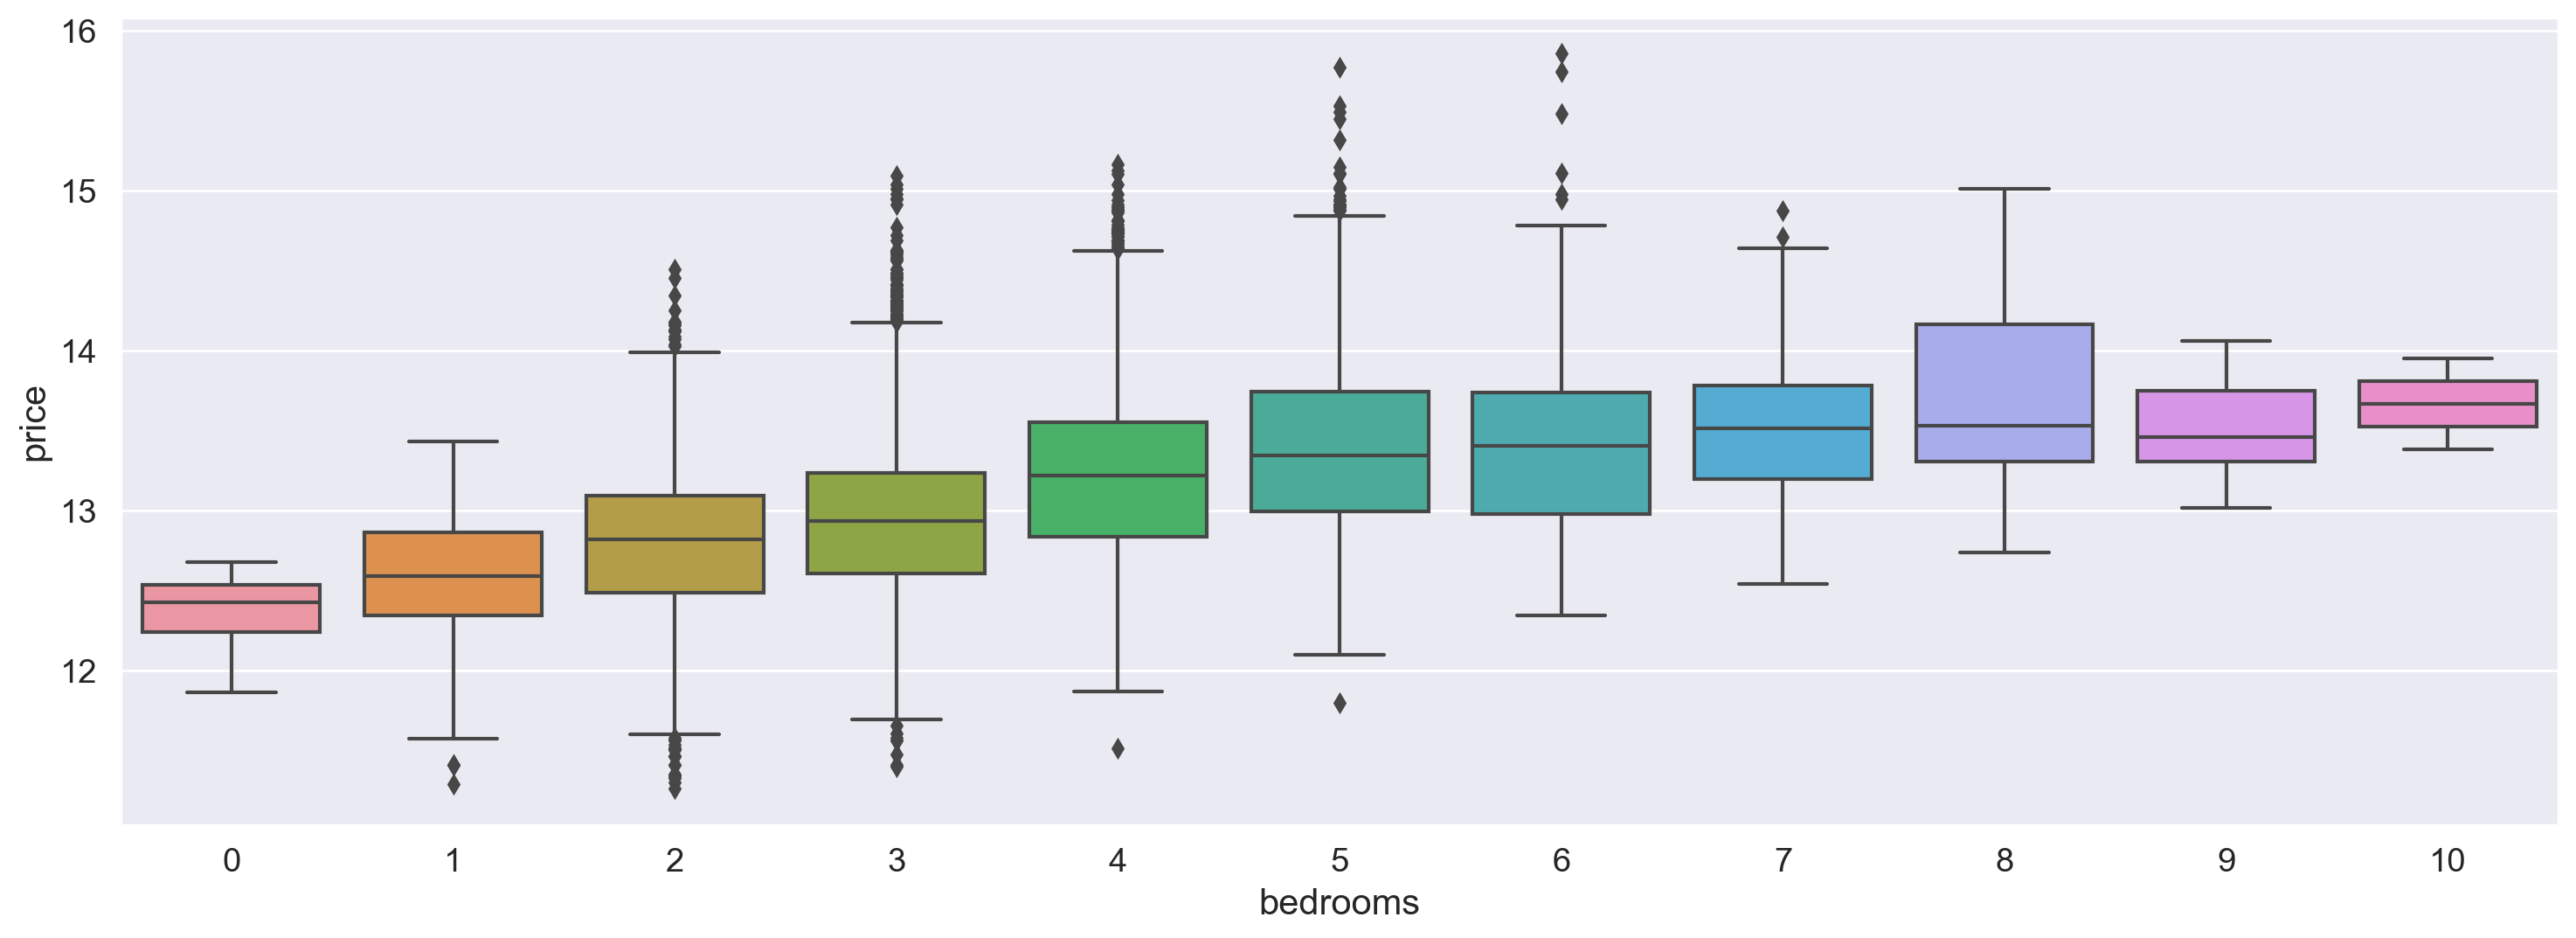

In [20]:
data = pd.concat([train['price'],train['bedrooms']],axis=1)
f,ax = plt.subplots(figsize=(18,6))
fig = sns.boxplot(x='bedrooms',y='price',data=data)

### 이상치 제거

#### sqft_living

In [21]:
train[train['sqft_living'] > 13000]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8912,201405,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,14.639686


sqft_living 같은 경우 부지크기가 14000에 가까운 데도 불구하고 price가 굉장히 낮다.

이상치라고 보고 제거 해준다.

In [22]:
train = train.loc[train.index != 8912]

#### grade

In [23]:
train.loc[(train['price']>12) & (train['grade'] == 3)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2302,201502,1,0.75,520,12981,1.0,0,0,5,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233,12.476104
4123,201411,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,12.542548


grade가 3인데 price가 4grade의 median값보다 더 높다. 이상치로 판단하고 제거 해줌.

In [24]:
train = train.loc[train.index != 2302]
train = train.loc[train.index != 4123]

In [25]:
train[(train['price']>15.5) & (train['grade'] == 11)]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2775,201406,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449,15.77031


In [26]:
train = train.iloc[train.index != 2775]

In [27]:
train[(train['price']>14.4) & (train['grade']==7)]
train = train.loc[train.index !=2775]

In [28]:
train[(train['price']>14.8) & (train['grade']==8)]
train = train.loc[train.index != 7173]

## 컬럼 늘려주기

In [29]:
train[train['yr_renovated']==train['yr_built']]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [30]:
for df in [train, test]:
    # 방의 전체 갯수
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']    
    
    # 거실의 비율
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot'] 
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_lot']
    
    # 면적 대비 거실의 비율
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']
    
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15']
    
    # 재건축 여부
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x : 0 if x < 0 else 1)

In [31]:
train['is_renovated'].unique()

array([0, 1], dtype=int64)

In [32]:
train['per_price'] = train['price'] / train['sqft_total_size']
zipcode_price = train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()
train = pd.merge(train,zipcode_price,how='left', on='zipcode')
test = pd.merge(test,zipcode_price,how='left',on='zipcode')

for df in [train, test]:
    df['zipcod_mean'] = df['mean'] * df['sqft_total_size']
    df['zipcode_var'] = df['var'] * df['sqft_total_size']
    del df['mean']; del df['var']

In [33]:
y=train['price']
train.drop(['price'],axis=1,inplace=True)

In [34]:
train.drop(['per_price'],axis=1,inplace=True)

In [35]:
train.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'zipcod_mean', 'zipcode_var'],
      dtype='object')

In [36]:
test.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'zipcod_mean', 'zipcode_var'],
      dtype='object')

## 모델 튜닝

In [37]:
import statsmodels.api as sm

model = sm.OLS(y.values,train[train.columns])
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.763e+06
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        23:37:55   Log-Likelihood:                         -238.62
No. Observations:               15030   AIC:                                      525.2
Df Residuals:                   15006   BIC:                                      708.1
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

변수 들 중 p-value가 높은 값이 있다. 변수들끼리의 합, 곱 등의 연산으로 만든 열이 있어 기존 변수와 연관되어있고,

sqft_ 로 시작하는 변수들 끼리의 상관성등이 있어서 다중공선성의 문제가 생길 수 있다.

In [38]:
# 다중 공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Feature'] = train.columns
vif['VIF Values'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]

vif.sort_values(by='VIF Values', ascending=False)

,Feature,VIF Values
1,bedrooms,inf
2,bathrooms,inf
3,sqft_living,inf
4,sqft_lot,inf
21,sqft_total_size,inf
19,total_rooms,inf
10,sqft_above,inf
11,sqft_basement,inf
14,zipcode,4.940893e+06
0,date,3.907721e+06


보통 10이상이면 다중공선성이 존재한다고 할 수 있는데, 위표를 보면 많은 변수들이 다중공선성에 있다고 볼 수 있다.

해결 방안으로
- 다중공선성에 rubust한 트리모델 사용
- 변수제거 및 FE, 변환을 통해 대체
- 관측값을 늘려 표본 크기 증가

In [39]:
random_state=28

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost,xgboost,lightgbm,rdforest]

In [40]:
def rmse(y_test,y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))

In [41]:
# 함수로 압축
def get_scores(models, train, y):
    
    df = {}
    for model in models:
        model_name = model.__class__.__name__
        X_train,X_test,y_train,y_test = train_test_split(train,y,random_state=random_state,test_size=0.2)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        df[model_name] = rmse(y_test,y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE',ascending=False)
    return score_df
get_scores(models, train, y)

,RMSE
RandomForestRegressor,133000.162688
GradientBoostingRegressor,129671.567388
XGBRegressor,122306.567835
LGBMRegressor,115144.576869


## 하이퍼 파라미터 튜닝

In [42]:
param_grid = {
    'max_depth': [-1],
    'n_estimators' : [100, 150,200,300,350],
    'learning_rate' : [0.09],
    #'bagging_fraction' : [0.3,0.6,0.9], # Row 샘플링
    #'num_iteration' : [1000],
    'feature_fraction' : [0.9],  # 컬럼 샘플링 >> 다양성 높힘
    #'scale_pos_weight' : [1, 1.2, 1.4],  # 정확도에 영향을 많이 줌. 불균형셋에서 뻥튀기시켜줌 (이번 데이터에는 영향력이 별로 없는 듯.)
    'boosting' : ['gbdt'] ,  # ,'dart','goss'
    'metric' : ['rmsle'],  # 'regression_l2','MAPE','rmse',
    #'num_leaves': [32],
    #'min_data_in_leaf': [30]
}

In [43]:
model = LGBMRegressor(random_state=random_state)

In [44]:
grid_model = GridSearchCV(model, param_grid=param_grid,
                         scoring='neg_mean_squared_error',
                         cv=5,verbose=1, n_jobs=5)
grid_model.fit(train,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=28), n_jobs=5,
             param_grid={'boosting': ['gbdt'], 'feature_fraction': [0.9],
                         'learning_rate': [0.09], 'max_depth': [-1],
                         'metric': ['rmsle'],
                         'n_estimators': [100, 150, 200, 300, 350]},
             scoring='neg_mean_squared_error', verbose=1)

In [45]:
grid_model.cv_results_

{'mean_fit_time': array([0.53930016, 0.66465244, 0.87511907, 1.16902704, 1.17701492]),
 'std_fit_time': array([0.01789063, 0.03129104, 0.01481142, 0.05482776, 0.07045374]),
 'mean_score_time': array([0.02926888, 0.03101282, 0.04249492, 0.05879283, 0.06217504]),
 'std_score_time': array([0.00564201, 0.00535613, 0.00271587, 0.00600277, 0.00139833]),
 'param_boosting': masked_array(data=['gbdt', 'gbdt', 'gbdt', 'gbdt', 'gbdt'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_feature_fraction': masked_array(data=[0.9, 0.9, 0.9, 0.9, 0.9],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.09, 0.09, 0.09, 0.09, 0.09],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[-1, -1, -1, -1, -1],
              mask=[False, False, False, 

In [46]:
params = grid_model.cv_results_['params']
params

[{'boosting': 'gbdt',
  'feature_fraction': 0.9,
  'learning_rate': 0.09,
  'max_depth': -1,
  'metric': 'rmsle',
  'n_estimators': 100},
 {'boosting': 'gbdt',
  'feature_fraction': 0.9,
  'learning_rate': 0.09,
  'max_depth': -1,
  'metric': 'rmsle',
  'n_estimators': 150},
 {'boosting': 'gbdt',
  'feature_fraction': 0.9,
  'learning_rate': 0.09,
  'max_depth': -1,
  'metric': 'rmsle',
  'n_estimators': 200},
 {'boosting': 'gbdt',
  'feature_fraction': 0.9,
  'learning_rate': 0.09,
  'max_depth': -1,
  'metric': 'rmsle',
  'n_estimators': 300},
 {'boosting': 'gbdt',
  'feature_fraction': 0.9,
  'learning_rate': 0.09,
  'max_depth': -1,
  'metric': 'rmsle',
  'n_estimators': 350}]

In [47]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.02683572, -0.02636703, -0.0261658 , -0.02607082, -0.02605979])

In [48]:
results=pd.DataFrame(params)
results['score']=score
results

,boosting,feature_fraction,learning_rate,max_depth,metric,n_estimators,score
0,gbdt,0.9,0.09,-1,rmsle,100,-0.026836
1,gbdt,0.9,0.09,-1,rmsle,150,-0.026367
2,gbdt,0.9,0.09,-1,rmsle,200,-0.026166
3,gbdt,0.9,0.09,-1,rmsle,300,-0.026071
4,gbdt,0.9,0.09,-1,rmsle,350,-0.026060


In [49]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

,boosting,feature_fraction,learning_rate,max_depth,metric,n_estimators,score,RMSE
0,gbdt,0.9,0.09,-1,rmsle,100,-0.026836,0.163816
1,gbdt,0.9,0.09,-1,rmsle,150,-0.026367,0.162379
2,gbdt,0.9,0.09,-1,rmsle,200,-0.026166,0.161758
3,gbdt,0.9,0.09,-1,rmsle,300,-0.026071,0.161465
4,gbdt,0.9,0.09,-1,rmsle,350,-0.026060,0.161430


In [50]:
results = results.rename(columns={'RMSE' : 'RMSLE'})
results.sort_values('RMSLE')
results

,boosting,feature_fraction,learning_rate,max_depth,metric,n_estimators,score,RMSLE
0,gbdt,0.9,0.09,-1,rmsle,100,-0.026836,0.163816
1,gbdt,0.9,0.09,-1,rmsle,150,-0.026367,0.162379
2,gbdt,0.9,0.09,-1,rmsle,200,-0.026166,0.161758
3,gbdt,0.9,0.09,-1,rmsle,300,-0.026071,0.161465
4,gbdt,0.9,0.09,-1,rmsle,350,-0.026060,0.161430


In [51]:
results['RMSLE'].min(axis=0)

0.16143045043066467

In [62]:
results[results['RMSLE']==0.16143045043066467]

,boosting,feature_fraction,learning_rate,max_depth,metric,n_estimators,score,RMSLE
4,gbdt,0.9,0.09,-1,rmsle,350,-0.02606,0.16143


In [53]:
# 함수로 압축

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error',
                         cv=5,verbose=verbose, n_jobs=n_jobs)
    
    grid_model.fit(train,y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results=pd.DataFrame(params)
    results['score']=score
    
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    return results


In [54]:
'''
param_grid = {'n_estimators' : [50, 100], 'max_depth' : [1,10]}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)
'''

"\nparam_grid = {'n_estimators' : [50, 100], 'max_depth' : [1,10]}\n\nmodel = LGBMRegressor(random_state=random_state)\nmy_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)\n"

## 모델 선정/학습/결과도출

In [68]:
model = LGBMRegressor(
    metric = "rmse",
    boosting =  'gbdt',
    feature_fraction=0.9,
    learning_rate=0.09,
    max_depth=-1,
    n_estimators=300,
    #scale_pos_weight=1.2,
    #bagging_fraction=0.3
                     )
model.fit(train, y)
prediction_lgb = model.predict(test)
prediction_lgb


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9


array([13.14035351, 13.16703509, 14.18360216, ..., 13.03235233,
       12.67928198, 13.01472587])

In [69]:
prediction_lgb = np.expm1(prediction_lgb)
prediction_lgb

array([ 509075.46709105,  522841.25732841, 1444973.40030361, ...,
        456959.54494196,  321026.47069494,  448975.51961942])

In [70]:
data_dir = 'kaggle-kakr-housing-data/data'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission

,id,price
0,15035,100000
1,15036,100000
2,15037,100000
3,15038,100000
4,15039,100000
...,...,...
6463,21498,100000
6464,21499,100000
6465,21500,100000
6466,21501,100000


In [71]:
submission['price'] = prediction_lgb
submission.head()

,id,price
0,15035,5.090755e+05
1,15036,5.228413e+05
2,15037,1.444973e+06
3,15038,2.841934e+05
4,15039,3.323185e+05


In [72]:
submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, 'lgb',0.1614304)
submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

kaggle-kakr-housing-data/data/submission_lgb_RMSLE_0.1614304.csv


In [60]:
# 함수로 압축
'''
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    data_dir = 'kaggle-kakr-housing-data/data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))
'''

"\ndef save_submission(model, train, y, test, model_name, rmsle=None):\n    model.fit(train, y)\n    prediction = model.predict(test)\n    prediction = np.expm1(prediction)\n    data_dir = 'kaggle-kakr-housing-data/data'\n    submission_path = join(data_dir, 'sample_submission.csv')\n    submission = pd.read_csv(submission_path)\n    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)\n    submission.to_csv(submission_csv_path, index=False)\n    print('{} saved!'.format(submission_csv_path))\n"

In [61]:
#save_submission(model, train, y, test, 'lgbm', rmsle='0.164399')

## 회고

데이터를 처리하고 학습하고 예측을 내는 작업들 중 우선 순위를 매길 것 없이 다 중요한 작업들이란 것을 느꼈다.

전처리 같은 경우 housing 데이터는 결측치가 없어서 처리해줄 필요는 없었지만, 

데이터 컬럼의 갯수가 부족해서 결과 랭크 점수가 잘 내려가지 않는 상황이었습니다. 그래서 총 방의 갯수, 면적 대비 거실의 비율, built년도 등을
이용하여 재건축여부와 같이 이미 있는 컬럼들을 이용해서 컬럼 수를 늘렸더니 private 점수가 1000점이나 훅 떨어졌다.

모델에 비해 feature가 부족한 과적합 상황을 막아줬다고 볼 수도 있을 것 같습니다.

또한 노이즈가 낀 예측값을 만들어 낼 수도 있는 이상치들을 제거하는 과정에서 작은 sqft_ 값들에 비해 price가 정상 적이지 않다고 볼 수도 있는 데이터가 있었지만, 
서울 집값 처럼 면적은 좁지만 가격은 비싼 상황이 있을 수 있다는 점을 고려해 놔뒀습니다.

그 다음으로 모델은 rmse 가장 적은 lgb를 사용했는데, 하이퍼 파라미터를 아무리 조정해도 캐글 점수가 11만 4000점 밑으로 내려가지가 않아서 여러 조합으로 넣어보았지만, 파라미터를 조정하면 할 수록 점수는 커지는 마법같은 일들이 벌어지고 있었다. xgboost와 lgb를 혼합하여 어느정도 비율을 주고 조합도 해보았지만 떨어지지않았다. 도저히 무슨 문제인지 아직까지 의아한 상황. 더 많은 방법을 찾아봐야겠다는 생각이 들었습니다.

점수 private : 114202, public : 110561

## 참고문헌

exp(x)-1 https://numpy.org/doc/stable/reference/generated/numpy.expm1.html

log(1+x) https://numpy.org/doc/stable/reference/generated/numpy.log1p.html

gridSearchCV에 사용할만한 scoring(점수체계) parameter https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

lightGBM/XGBoost 파라미터 http://machinelearningkorea.com/2019/09/29/lightgbm-%ED%8C%8C%EB%9D%BC%EB%AF%B8%ED%84%B0/

lightGBM https://injo.tistory.com/48

https://www.kaggle.com/code/chocozzz/house-price-prediction-eda-updated-2019-03-12